In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4

In [3]:
%run "C:/Users/blake/PMT/PyPMT.ipynb"

In [4]:
# import BedMachine Greenland: https://sites.ps.uci.edu/morlighem/dataproducts/bedmachine-greenland/

nc = netCDF4.Dataset('C:/Users/blake/OneDrive/Desktop/BedMachineAntarctica-v3.nc') #

In [5]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7
    Title: BedMachine Antarctica
    Author: Mathieu Morlighem
    version: 03-Jun-2022 (v3.4)
    nx: 13333.0
    ny: 13333.0
    Projection: Polar Stereographic South (71S,0E)
    proj4: +init=epsg:3031
    sea_water_density (kg m-3): 1027.0
    ice_density (kg m-3): 917.0
    xmin: -3333000
    ymax: 3333000
    spacing: 500
    no_data: -9999.0
    license: No restrictions on access or use
    Data_citation: Morlighem M. et al., (2019), Deep glacial troughs and stabilizing ridges unveiled beneath the margins of the Antarctic ice sheet, Nature Geoscience (accepted)
    Notes: Data processed at the Department of Earth System Science, University of California, Irvine
    dimensions(sizes): x(13333), y(13333)
    variables(dimensions): |S1 mapping(), int32 x(x), int32 y(y), int8 mask(y, x), float32 firn(y, x), float32 surface(y, x), float32 thickness(y, x), float32 bed(

In [6]:
nc.variables

{'mapping': <class 'netCDF4._netCDF4.Variable'>
 |S1 mapping()
     grid_mapping_name: polar_stereographic
     latitude_of_projection_origin: -90.0
     standard_parallel: -71.0
     straight_vertical_longitude_from_pole: 0.0
     false_easting: 0.0
     false_northing: 0.0
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of   used,
 'x': <class 'netCDF4._netCDF4.Variable'>
 int32 x(x)
     long_name: Cartesian x-coordinate
     standard_name: projection_x_coordinate
     units: meter
 unlimited dimensions: 
 current shape = (13333,)
 filling on, default _FillValue of -2147483647 used,
 'y': <class 'netCDF4._netCDF4.Variable'>
 int32 y(y)
     long_name: Cartesian y-coordinate
     standard_name: projection_y_coordinate
     units: meter
 unlimited dimensions: 
 current shape = (13333,)
 filling on, default _FillValue of -2147483647 used,
 'mask': <class 'netCDF4._netCDF4.Variable'>
 int8 mask(y, x)
     long_name: mask
     grid_mapping: mapping
     valid_

In [7]:
x = nc.variables['x'][:]
y = nc.variables['y'][:]
bed = nc.variables['bed'][:]
surface = nc.variables['surface'][:]
thick = nc.variables['thickness'][:]
mask = nc.variables['mask'][:]

In [8]:
# reshape
bed2d = bed.reshape(13333, 13333)
surf2d = surface.reshape(13333, 13333)
thick2d = thick.reshape(13333, 13333)
mask2d = mask.reshape(13333, 13333)

# crop surface where ice thickness is 0
surf2d=surf2d.astype('float')
surf2d[thick2d <= 0] = np.NAN

# remove ocean from bed
#bed2d=bed2d.astype('float')
#bed2d[mask == 0] = np.NAN

Text(0.5, 1.0, 'Study Area')

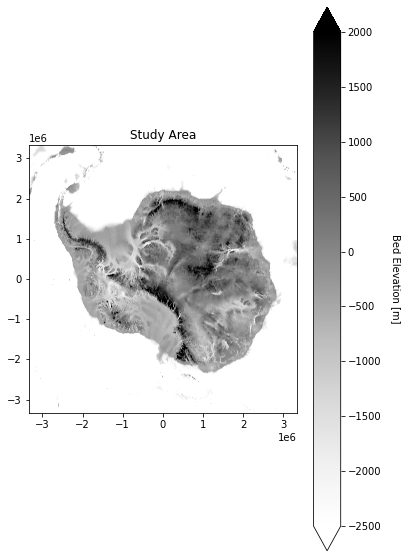

In [9]:
# make bed map
plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -2500, vmax = 2000, cmap="Greys")
#cont = plt.contour(bed2d, 0, origin = 'lower', colors = 'k')
cbar = plt.colorbar(im, extend='both')
cbar.set_label("Bed Elevation [m]", rotation=270, labelpad=20)      # add labels to the color bar
#cbar.add_lines(cont)
#plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=.75) # adjust the plot size
plt.title('Study Area')

Text(0.5, 1.0, 'Ice coverage')

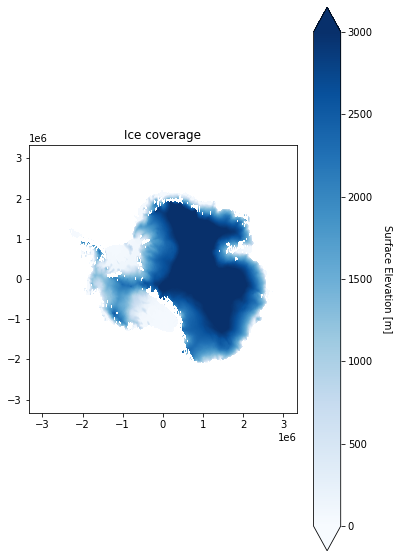

In [10]:
# make surface map
plt.figure(figsize=(6,10))
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 0, vmax = 3000, cmap="Blues")
cbar = plt.colorbar(extend='both')
cbar.set_label("Surface Elevation [m]", rotation=270, labelpad=20)      # add labels to the color bar
#plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=.75) # adjust the plot size
plt.title('Ice coverage')

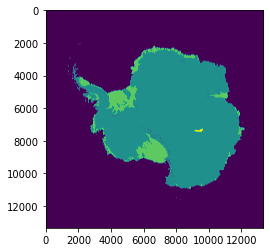

In [11]:
plt.imshow(mask2d)

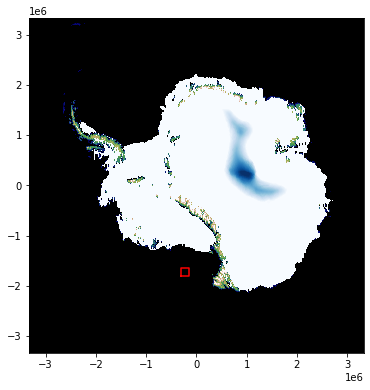

In [12]:
# make bed map
xx = [-3e5, -3e5, -1.5e5, -1.5e5, -3e5]
yy = [-1.8e6, -1.65e6, -1.65e6, -1.8e6, -1.8e6]

fig = plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -100, vmax = 2000, cmap="gist_earth")
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 3500, vmax = 4000, cmap="Blues")
plt.plot(xx,yy, 'r-')

In [13]:
# testing for gridded_flux
"""X, Y = np.meshgrid(x, y)
vx = itslive_"""

Text(0.5, 1.0, 'textps testing')

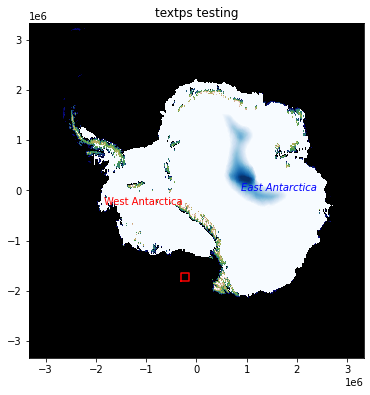

In [18]:
# testing for textps
# make bed map
xx = [-3e5, -3e5, -1.5e5, -1.5e5, -3e5]
yy = [-1.8e6, -1.65e6, -1.65e6, -1.8e6, -1.8e6]

fig = plt.figure(figsize=(6,10))
im = plt.imshow(bed2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = -100, vmax = 2000, cmap="gist_earth")
plt.imshow(surf2d, extent = [x.min(), x.max(), y.min(), y.max()], vmin = 3500, vmax = 4000, cmap="Blues")
plt.plot(xx,yy, 'r-')
textps(-80, -105, 'West Antarctica', color = 'red') #testing textps
textps(-75, 90, 'East Antarctica', fontstyle='italic', color='blue')
plt.title('textps testing')